<a href="https://colab.research.google.com/github/LTreba/Analise_DataFrame/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns


## **CASE: Insurance** 

Acesse a base de dados [`insurance`](https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/insurance.csv) para as questões a seguir.



##### Q1. Acesse os dados explore a estrutura básica dos dados de `insurance`.

> * Qual o número de caso de seguro? 
> * Quantos atributos são numéricos? 
> * Há quantos valores diferentes para região? 
> * Qual a maior quantidade de filhos? 

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/Rogerio-mack/Analise_de_dados_labs/main/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##### Q2. Qual a quantidade de casos por região?

In [46]:
df.region.value_counts() 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [39]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [53]:
selecao = df["region"] == "southwest"
print(f"A quantidade de registros em southwest é de {df[selecao].shape[0]}")

A quantidade de registros em southwest é de 325


In [25]:
selecao = df["region"] == "northwest"
print(f"A quantidade de registros em northwest é de {df[selecao].shape[0]}")

A quantidade de registros em northwest é de 325


In [26]:
selecao = df["region"] == "northeast"
print(f"A quantidade de registros em northeast é de {df[selecao].shape[0]}")

A quantidade de registros em northeast é de 324


In [27]:
selecao = df["region"] == "southeast"
print(f"A quantidade de registros em southeast é de {df[selecao].shape[0]}")

A quantidade de registros em southeast é de 364


##### Q3. Qual a média dos pagamentos (charges) efetuados?

In [28]:
print(f"A média de pagamentos é de {df.charges.mean():.2f}")

A média de pagamentos é de 13270.42


##### Q4. Qual a média dos pagamentos (charges) dos 10 maiores pagamentos efetuados?

In [29]:

selecao = df.sort_values(by="charges", ascending = False).iloc[1:11]
print(f"A média das 10 maiores gorjetas é de {selecao.charges.mean().round(2)}")

A média das 10 maiores gorjetas é de 53636.36


##### Q5. Qual o percentual de mulheres seguradas?

In [30]:
selecao = df["sex"] == "female"
num_total = df.shape[0]
num_mulheres = df[selecao].shape[0]
porcentagem = (num_mulheres/num_total)*100
print(f"O percentual de mulheres seguradas é de {porcentagem:.2f}%")


O percentual de mulheres seguradas é de 49.48%


##### Q6. Qual o percentual de mulheres seguradas?

In [31]:
selecao = df["sex"] == "male"
num_total = df.shape[0]
num_homens = df[selecao].shape[0]
porcentagem = (num_homens/num_total)*100
print(f"O percentual de mulheres seguradas é de {porcentagem:.2f}%")

O percentual de mulheres seguradas é de 50.52%


##### Q7. Qual o valor médio pago pelos homens segurados?

In [32]:
selecao = df["sex"] == "male"
media = df[selecao].charges.mean()
print(f"A média paga pelos homens é de {media:.2f}")

A média paga pelos homens é de 13956.75


##### Q8. Qual a média de idade dos homens e mulheres?

In [33]:
selecao = df["sex"] == "male"
mediahomens = df[selecao].age.mean()
selecao = df["sex"] == "female"
mediamulheres = df[selecao].age.mean()
print(f"A média de idade de homens é de {mediahomens:.2f}\nA média de idade de mulheres é de {mediamulheres:.2f}")

A média de idade de homens é de 38.92
A média de idade de mulheres é de 39.50


##### Q9. Calcule a distância interquartis dos pagamentos.

**Dica** Empregue a função `quantile()` do `Pandas` e use IQR = Q3 - Q1.



In [34]:
q1 = float(df.charges.quantile([0.25]))
q3 = float(df.charges.quantile([0.75]))
diqr = q3-q1
print(f"A distância interquartil é de {diqr}")

A distância interquartil é de 11899.625365


##### Q10. Empregue o valor IQR da questão anterior para verificar se existem *outliers* dos pagamentos.

**Dica** *outliers* são dados fora do intervalo $[Q1 - 1.5 IQR, Q3 + 1.5 IQR]$ 

In [52]:
intervalo1 = q1-(1.5*diqr)
intervalo2 = q3+(1.5*diqr)
selecao = (df["charges"] <= intervalo1) | (df["charges"] >= intervalo2)
if(df[selecao].shape[0] == 0):
  print("Não existem outliers")
else:
  print(f"Existem {df[selecao].shape[0]} outliers!")

Existem 139 outliers!


##### Q11. Faça um gráfico de caixa dos valores de `charges` para homens e mulheres.

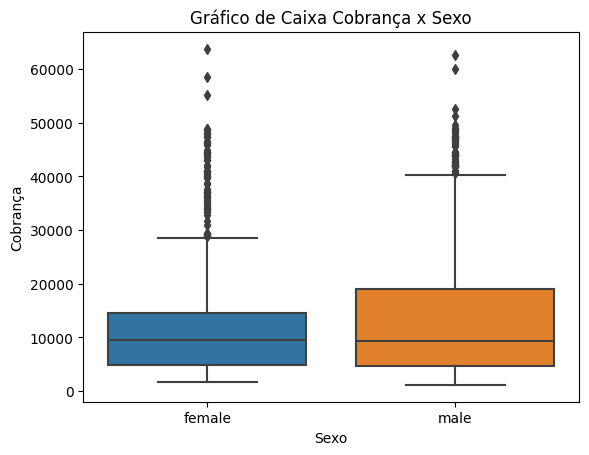

In [36]:
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Gráfico de Caixa Cobrança x Sexo")
plt.xlabel("Sexo")
plt.ylabel("Cobrança")
plt.show()